# Brief explanation of the repository's methods

In [1]:
import os
os.chdir('/home/roberto/Documents/Titulación/Tesina/')

In [2]:
from scripts import *

The backbone of the project is the data from Copernicus EU. In order to access it, first one must sign up at their website ([Copernicus](https://www.copernicus.eu/en)), and they will provide instructions in order to access directly their API while running code.
<br>
After that, in short, we can theoretically submit queries from Python to download data from their massive database, ERA5.
<br><br><br>
Atlite's algorithm works as follows:
<br>
1. Using Geopandas, we create a map of the EU's country of interest, which will also create a vector that describes it's shape and coordinates.

<AxesSubplot:>

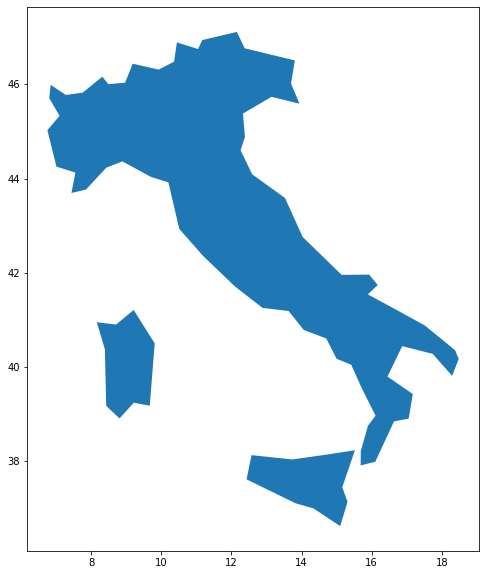

In [4]:
country = 'Italy'
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
shapes = world[world.name.isin([country])].set_index('name')
shapes.plot(figsize = (10,10))

2. We merge the map with a previously downloaded file from Copernicus, called Corine.tif
<br>This new file is a map in which all of the EU is divided in a grid of 100m x 100m squares, in which every square indicates the type of landuse in those coordinates.
<br>There are a total of 44 types of landuse defined for the region. 
<br><br>We can then ask Atlite to give us the map of the country of interest with the 100x100 points where the landuse is the one we are interested in analyzing.
<br>For vizualisation purposes, we will initially ask it to show us half of the landuse types in a map.
<br>The resulting map:

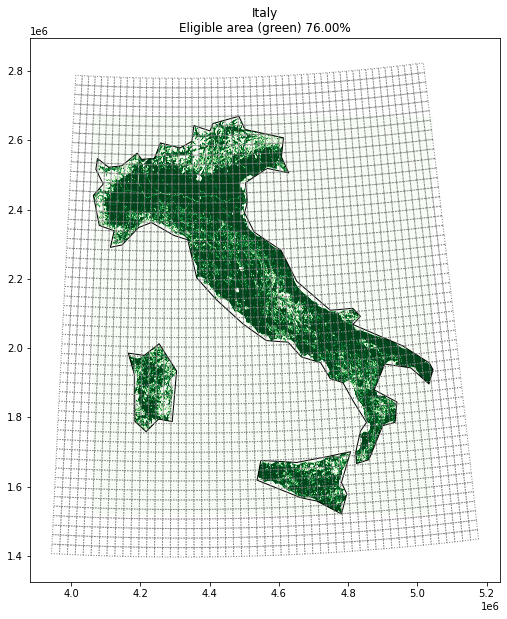

In [5]:
eligible_area(country,list(range(25)))

For this project, we are only focused on *dump* designated coordinates. <br>The map for such lands:

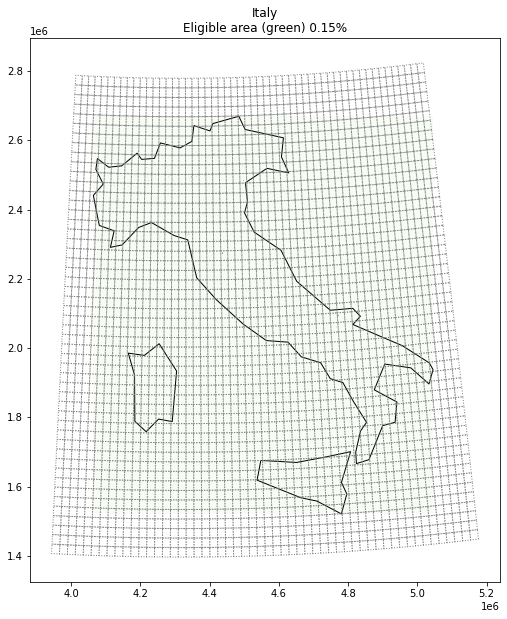

In [6]:
eligible_area(country)

Only 0.15% of the country, but it will still prove to be big in the long run.

3. Given the coordinates, Atlite's model now only needs another parameter to submit a query to download Copernicus' data: time. We must ask for a specific timeframe and coordinates to download the climate data.
<br><br>
4. When executing the last instruction, Python will create a file named cutout in which it will save the data downloaded from Copernicus, and when executing Atlite's pv method, the downloaded data will be processed and as an output it will return a time series with the electric generation for each hour of the specified timeframe.
<br><br><br><br>Here is how it would look for Italy on one day, August 12th, 2010.

In [7]:
solar_one_day(country,2010,8,12)

Compute availability matrix: 100%|██████████| 1/1 [00:04<00:00,  4.52s/ gridcells]
2022-08-30 16:07:56,164 INFO Requesting data for feature temperature...
2022-08-30 16:07:56,175 INFO Requesting data for feature height...
2022-08-30 16:07:56,185 INFO Requesting data for feature influx...
2022-08-30 16:07:56,188 INFO Requesting data for feature wind...
2022-08-30 16:08:00,123 INFO CDS: Downloading variables
	 * geopotential (2010)

2022-08-30 16:08:01,356 INFO CDS: Downloading variables
	 * runoff (2010)

2022-08-30 16:08:02,605 INFO CDS: Downloading variables
	 * 100m_u_component_of_wind (2010)
	 * 100m_v_component_of_wind (2010)
	 * forecast_surface_roughness (2010)

2022-08-30 16:08:04,228 INFO CDS: Downloading variables
	 * 2m_temperature (2010)
	 * soil_temperature_level_4 (2010)

2022-08-30 16:08:06,060 INFO CDS: Downloading variables
	 * surface_net_solar_radiation (2010)
	 * surface_solar_radiation_downwards (2010)
	 * toa_incident_solar_radiation (2010)
	 * total_sky_direct_sol

[########################################] | 100% Completed |  0.1s


2022-08-30 16:08:08,264 INFO Convert and aggregate 'pv'.


name,Italy[MWh]
time,
2010-08-12 00:00:00,0.000000
2010-08-12 01:00:00,0.000000
2010-08-12 02:00:00,0.000000
2010-08-12 03:00:00,0.000000
2010-08-12 04:00:00,0.000000
2010-08-12 05:00:00,2.594394
2010-08-12 06:00:00,49.184262
2010-08-12 07:00:00,153.233316
2010-08-12 08:00:00,270.233644


### Scaling it for more than one day: Spain and Germany's data from 2008 to 2017
<br><br>It was decided to use two very different countries, weatherwise, for this project to showcase how steady and significant the energy output from solar can be in both warm and cold countries.
<br><br>In practice, each year of the twenty of data needed took around one hour to download. The processing once downloaded was, however, very quick.
<br>It was decided to create a method that would execute the process for all 20 years automatically as follows:

In [3]:
execute_order_66() # lol

/home/roberto/.local/lib/python3.8/site-packages/atlite/cutout.py:187: UserWarning: Arguments module, bounds, time are ignored, since cutout is already built.
  warn(
Compute availability matrix: 100%|██████████| 1/1 [00:03<00:00,  3.54s/ gridcells]
/home/roberto/.local/lib/python3.8/site-packages/atlite/cutout.py:187: UserWarning: Arguments module, bounds, time are ignored, since cutout is already built.
  warn(
Compute availability matrix: 100%|██████████| 1/1 [00:02<00:00,  2.56s/ gridcells]
/home/roberto/.local/lib/python3.8/site-packages/atlite/cutout.py:187: UserWarning: Arguments module, bounds, time are ignored, since cutout is already built.
  warn(
Compute availability matrix: 100%|██████████| 1/1 [00:02<00:00,  2.56s/ gridcells]
/home/roberto/.local/lib/python3.8/site-packages/atlite/cutout.py:187: UserWarning: Arguments module, bounds, time are ignored, since cutout is already built.
  warn(
Compute availability matrix: 100%|██████████| 1/1 [00:02<00:00,  2.54s/ gridcells]


After the process is finalized, the output gets written into a single csv file.
<br>Here's how it looks:

In [4]:
df = read_single_csv()
df.head(24)

,Spain,Germany
time,,
2008-01-01 00:00:00,0.000000,0.000000
2008-01-01 01:00:00,0.000000,0.000000
2008-01-01 02:00:00,0.000000,0.000000
2008-01-01 03:00:00,0.000000,0.000000
2008-01-01 04:00:00,0.000000,0.000000
2008-01-01 05:00:00,0.000000,0.000000
2008-01-01 06:00:00,0.000000,0.000000
2008-01-01 07:00:00,0.000000,0.000000
2008-01-01 08:00:00,0.005370,0.007675


We now have the data of electric pv potential in dump designated land for each hour for 10 years for both Germany and Spain.
<br>However, it may not be so useful to have these data so scattered. We will compute it in different ways, such as aggregating for total production for a year, or for a month, in order to highlight whether or not it is consistent and significant enough to consider investing into.

In [5]:
anual_country('Spain')

,GWh Spain
2008,2012.569220
2009,2068.497769
2010,1972.003100
2011,2057.090720
2012,2105.052562
2013,2028.475450
2014,2000.478708
2015,2067.116762
2016,2012.581051
2017,2132.433017


In [6]:
anual_country('Germany')

,GWh Germany
2008,1474.065860
2009,1483.227915
2010,1449.498471
2011,1594.108377
2012,1526.017762
2013,1406.765194
2014,1510.099366
2015,1550.228983
2016,1499.200884
2017,1474.287475


For the ten years at hand, it can be noted that from year to year there is very little variation in each country's energy production, and for Spain this will be around 2 TWh, meanwhile for Germany it will be around 1.5 TWh, in spite of its notoriously worse climatic conditions.
<br><br>This results are preliminary very uplifting since they show both things the project intended to prove: that production will be big and that it will be consistent on a year to year basis.
<br><br>It is very interesting to observe how the production was distributed for each month on a yearly basis. The seasonal component of PV generation can be noted visually very clearly:

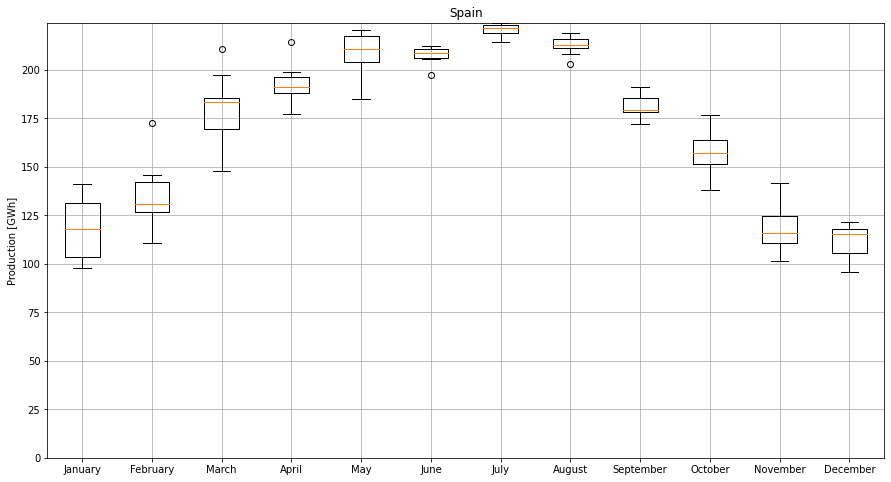

In [7]:
box_plots_monthly('Spain')

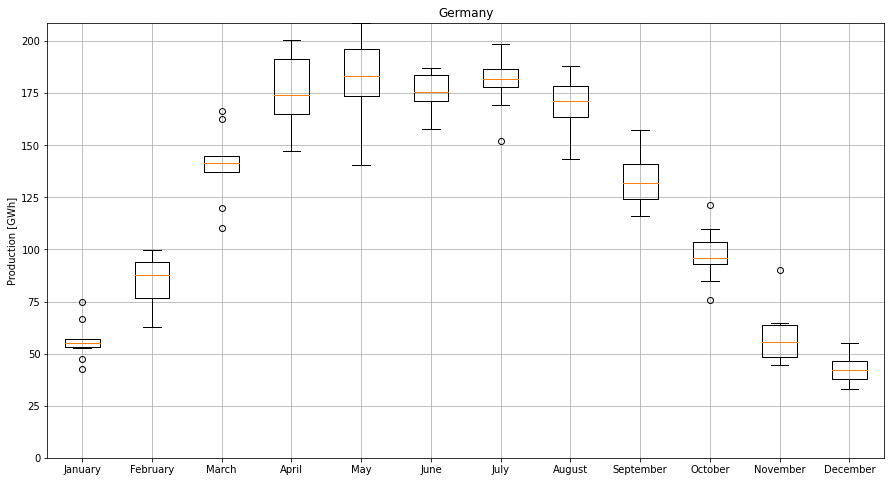

In [8]:
box_plots_monthly('Germany')

### Is there a business opportunity?